基于均匀采样,范围为[0,1],采样数为50000,边长为0.1的正方形面积为:0.00952
基于重要性采样，采样数为5000,边长为0.1的正方形面积为:0.01002 
基于重要性采样,重要性采样的概率密度函数还是为均匀采样,只不过范围为[0,0.2]
基于重要性采样，采样数为5000,边长为0.1的正方形面积为:0.00998 
基于重要性采样,重要性采样的概率密度函数还是为高斯采样,均值为0.05000,方差为0.03000


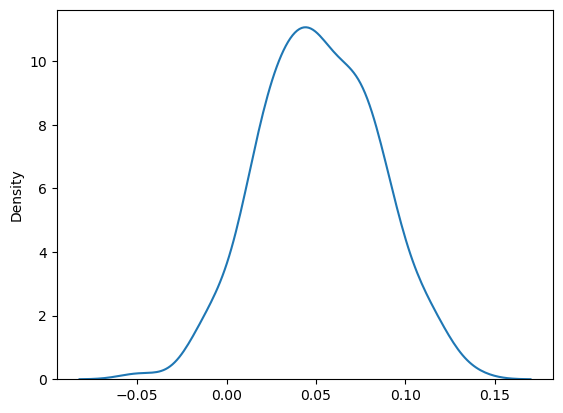

In [35]:
import random

#############################################################################################
#test1简单的均匀采样
def customFun1(x,y):
    
  if x>=0 and x<=0.1 and y>=0 and y<=0.1:
      rvl =1;
  else:
      rvl =0;
  return rvl


#test1简单的均匀采样
def test1():
    area =0
    n = 50000
    for i in range(n):
        x = random.random();
        y = random.random();
        rvl = customFun1(x,y);
        area = area+rvl;
        
    area = area/n
    str1 = "基于均匀采样,范围为[0,1],采样数为%d,边长为0.1的正方形面积为:%.5f" %(n,area)
    print(str1)
    return area

################################################################################
#test2简单的重要性采样
##概率密度函数还是为均匀采样,只不过范围为[0,0.2]
#https://zhuanlan.zhihu.com/p/41217212
def weight2(x,y):
    
    b= 1
    a= 0
    pi_x = 1/(b-a)
    pi_y = 1/(b-a)

    
    b= 0.2
    a= 0
    p_x = 1/(b-a);
    p_y = 1/(b-a);

    weightX = pi_x/p_x;
    weightY = pi_y/p_y;
    return weightX,weightY 
  
 
def test2():
    area =0
    n = 5000
    for i in range(n):
        x = random.random()/5;
        y = random.random()/5;
        weightX,weightY = weight2(x,y)
        rvl = customFun1(x,y);
        area = area+weightX*weightY*rvl;
        
    area = area/n
    str1 = "基于重要性采样，采样数为%d,边长为0.1的正方形面积为:%.5f \n" %(n,area)
    str2 = "基于重要性采样,重要性采样的概率密度函数还是为均匀采样,只不过范围为[0,0.2]"
    
    print(str1+str2)
    return area

############################################################################
#test3简单的重要性采样
##概率密度函数还是高斯分布，均值0.5，方差0.03
import numpy as np
from scipy.stats import norm
def weight3(x,y,mean1,std1):
    
   
    p_x = norm.pdf(x,loc = mean1, scale=std1)
    p_y = norm.pdf(y,loc = mean1, scale=std1)


    
    b= 1
    a= 0
    pi_x = 1/(b-a);
    pi_y = 1/(b-a);

    weightX = pi_x/p_x;
    weightY = pi_y/p_y;
    return weightX,weightY 
  
 
def test3():
    area =0
    n = 5000
    for i in range(n):
        mean1 = 0.05
        std1 = 0.03
        x = norm.rvs(size=1,loc=mean1,scale=std1)
        y = norm.rvs(size=1,loc=mean1,scale=std1)
        weightX,weightY = weight3(x,y,mean1,std1)
        rvl = customFun1(x,y);
        area = area+weightX*weightY*rvl;
        
    area = area/n
    str1 = "基于重要性采样，采样数为%d,边长为0.1的正方形面积为:%.5f \n" %(n,area)
    str2 = "基于重要性采样,重要性采样的概率密度函数还是为高斯采样,均值为%.5f,方差为%.5f" %(mean1,std1)
    
    print(str1+str2)
    return area
############################################################################
############主程序

test1()#test1简单的均匀采样

test2()#test2简单的重要性采样 

test3()#test2简单的重要性采样,高斯分布

import seaborn as sns
import numpy as np
sns.kdeplot(np.random.normal(loc=0.05,scale=0.03,size=200))
